# Wine dataset

#data observations

# Importing required libararies

In [114]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Loading Dataset

In [21]:
df=pd.read_csv('winedataset.csv')
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
df.shape

(178, 14)

In [24]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [25]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


# summary statistics

In [27]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


observation
1.not much difference in mean and median are observed.
2.also 75% data and max value have not much difference state no outliers are present. 

In [28]:
df.Magnesium.unique()

array([127, 100, 101, 113, 118, 112,  96, 121,  97,  98, 105,  95,  89,
        91, 102, 120, 115, 108, 116, 126, 124,  93,  94, 107, 106, 104,
       132, 110, 128, 117,  90, 103, 111,  92,  88,  87,  78, 151,  86,
       139, 136,  85,  99,  84,  70,  81,  80, 162, 134, 119,  82, 122,
       123], dtype=int64)

In [29]:
df.Class.unique()

array([1, 2, 3], dtype=int64)

In [30]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

# Data visualization

<AxesSubplot:>

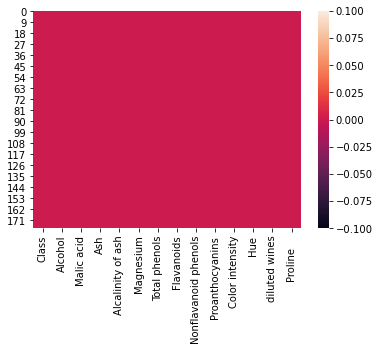

In [31]:
sns.heatmap(df.isnull())

no null values are present in data set

# check correlation

In [32]:
dfcor=df.corr()
dfcor

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<AxesSubplot:>

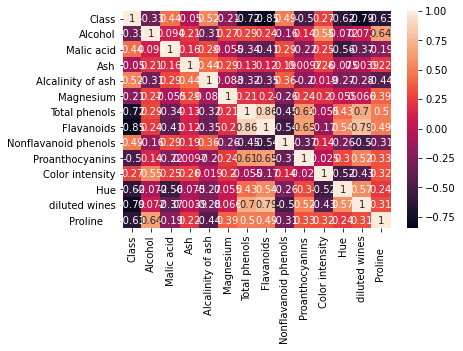

In [33]:
sns.heatmap(dfcor,annot=True)

The light colours are showing high correlations.

# Univariate analysis

<AxesSubplot:>

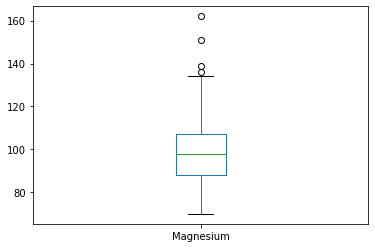

In [34]:
df['Magnesium'].plot.box()

some outliers are present in the Magnesium

<AxesSubplot:>

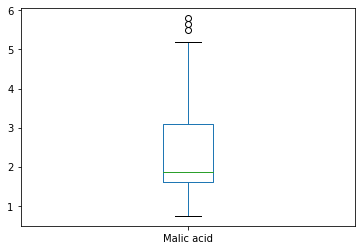

In [35]:
df['Malic acid'].plot.box()

<AxesSubplot:>

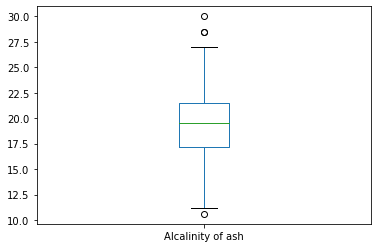

In [36]:
df['Alcalinity of ash'].plot.box()

<AxesSubplot:>

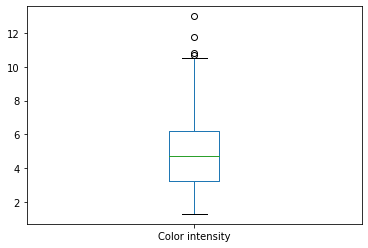

In [37]:
df['Color intensity'].plot.box()

In [38]:
df.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [ ]:
sns.pairplot(df)

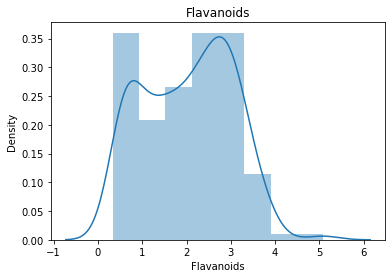

In [42]:
import matplotlib.pyplot as plt
sns.distplot(df["Flavanoids"])
plt.title("Flavanoids")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

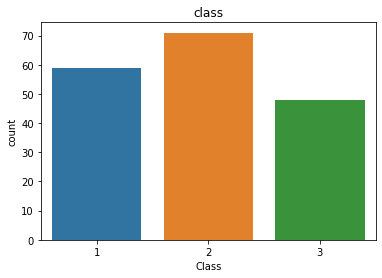

In [43]:
sns.countplot(df["Class"])
plt.title("class")
plt.show

In [44]:
df.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

Class                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic acid              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Alcalinity of ash       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Magnesium               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total phenols           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid phenols       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanthocyanins            AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color intensity            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
diluted wines              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Proline                    AxesSubplot

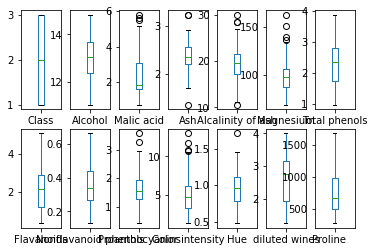

In [46]:
df.plot(kind='box',subplots=True,layout=(2,7))

# preparing data for machine learning

In [87]:
x=df.iloc[:,1:-1].values
x

array([[14.23,  1.71,  2.43, ...,  5.64,  1.04,  3.92],
       [13.2 ,  1.78,  2.14, ...,  4.38,  1.05,  3.4 ],
       [13.16,  2.36,  2.67, ...,  5.68,  1.03,  3.17],
       ...,
       [13.27,  4.28,  2.26, ..., 10.2 ,  0.59,  1.56],
       [13.17,  2.59,  2.37, ...,  9.3 ,  0.6 ,  1.62],
       [14.13,  4.1 ,  2.74, ...,  9.2 ,  0.61,  1.6 ]])

In [76]:
x.shape

(178, 12)

In [88]:
y=df.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [89]:
y.shape

(178,)

# Training Machine

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


In [98]:
x_train.shape

(119, 12)

In [99]:
y_train.shape

(119,)

In [100]:
x_test.shape

(59, 12)

In [101]:
y_test.shape

(59,)

In [102]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [103]:
lg.coef_

array([[ 0.0964592 ,  0.03017013,  0.95461335, -0.54247762,  0.01230743,
         0.14786881,  1.12040109, -0.04150876,  0.07832484,  0.36425062,
        -0.16685112,  0.90237158],
       [ 0.11986903, -0.24437153, -1.03049606,  0.3248583 , -0.01893594,
         0.28393082,  0.1451855 ,  0.1370414 ,  0.4598637 , -0.99269624,
         0.50487936, -0.0359081 ],
       [-0.21632823,  0.2142014 ,  0.0758827 ,  0.21761933,  0.00662852,
        -0.43179963, -1.26558659, -0.09553264, -0.53818855,  0.62844562,
        -0.33802824, -0.86646348]])

In [104]:
lg.intercept_

array([-0.40142414,  0.4909851 , -0.08956096])

In [105]:
lg.score(x_train,y_train)

0.9831932773109243

In [106]:
pred=lg.predict(x_test)
print('predicted class:',pred)
print('actual class:',y_test)

predicted class: [1 1 3 2 2 1 2 3 2 3 2 3 1 2 1 2 2 2 1 2 1 1 2 3 3 3 2 1 2 1 1 2 3 1 1 1 3
 3 1 3 1 2 2 2 3 1 2 2 3 1 1 1 1 3 3 2 1 1 2]
actual class: 19     1
45     1
140    3
30     1
67     2
16     1
119    2
174    3
109    2
141    3
24     1
150    3
41     1
118    2
15     1
111    2
113    2
82     2
9      1
114    2
18     1
66     2
60     2
169    3
171    3
164    3
117    2
65     2
90     2
55     1
29     1
128    2
145    3
31     1
12     1
42     1
158    3
137    3
98     2
159    3
38     1
108    2
85     2
68     2
143    3
2      1
100    2
122    2
154    3
51     1
76     2
56     1
26     1
153    3
138    3
104    2
78     2
36     1
93     2
Name: Class, dtype: int64


In [107]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.11864406779661017
mean squared error: 0.11864406779661017
root mean squared error: 0.34444748191358604


In [108]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7975490196078431


In [116]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print('accuracy rate:',accuracy_score(y_test,predgnb))
print('cofusion matrix:',confusion_matrix(y_test,predgnb))
print('classification:',classification_report(y_test,predgnb))

accuracy rate: 0.9830508474576272
cofusion matrix: [[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]
classification:               precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [117]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy score',accuracy_score(y_test,predsvc))
print('confusion matrix',confusion_matrix(y_test,predsvc))
print('classification report',classification_report(y_test,predsvc))

accuracy score 0.5254237288135594
confusion matrix [[10 10  0]
 [ 3 21  0]
 [ 3 12  0]]
classification report               precision    recall  f1-score   support

           1       0.62      0.50      0.56        20
           2       0.49      0.88      0.63        24
           3       0.00      0.00      0.00        15

    accuracy                           0.53        59
   macro avg       0.37      0.46      0.39        59
weighted avg       0.41      0.53      0.44        59



In [118]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy score',accuracy_score(y_test,preddtc))
print('confusion matrix',confusion_matrix(y_test,preddtc))
print('classification report',classification_report(y_test,preddtc))

accuracy score 0.8983050847457628
confusion matrix [[17  3  0]
 [ 2 22  0]
 [ 0  1 14]]
classification report               precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       0.85      0.92      0.88        24
           3       1.00      0.93      0.97        15

    accuracy                           0.90        59
   macro avg       0.91      0.90      0.91        59
weighted avg       0.90      0.90      0.90        59



# SAVING MODEL SERIALIZATION

In [120]:
dft=pd.DataFrame(predgnb)
dft.to_csv('class prediction.csv')

In [121]:
import joblib
joblib.dump(gnb,'gnbfile.obj')
gnb_from_joblib=joblib.load('gnbfile.obj')
gnb_from_joblib.predict(x_test)

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2], dtype=int64)